# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('./rose-pine.mplstyle')

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    ax.axis("off")
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [4]:
from utils import get_train_input

## Experiment 1: Occlusions

Objects being partialy covered is a big issue is this scenarios -> Use random black patches to make the model resiliant to occlusions. 

In [4]:
train_dataset = get_train_input("./experiments/augmentations_0/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1146261869236413282_1680_000_1700_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10599748131695282446_1380_000_1400_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', '/app/project/data/train/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11925224148023145510_1040_000_1060_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1051897962568538022_238_170_258_170_with_camera_labels.tfrecord', '/app/project/data/train/segment-100947433

INFO:tensorflow:Number of filenames to read: 70
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


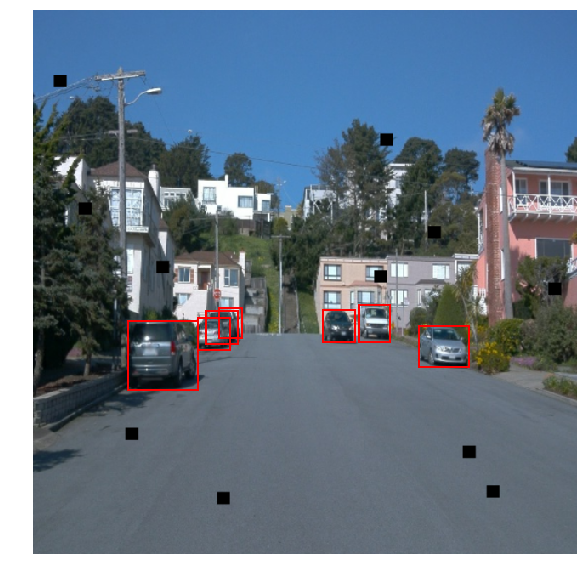

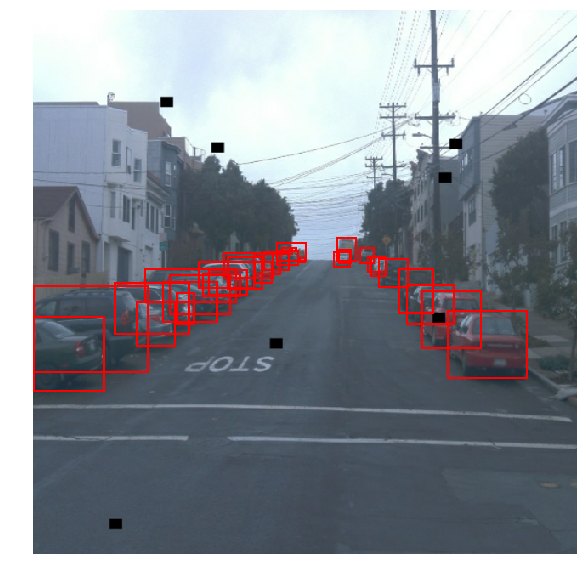

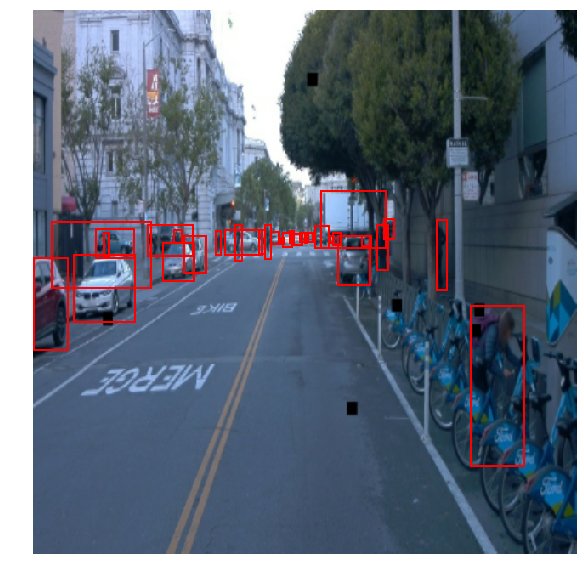

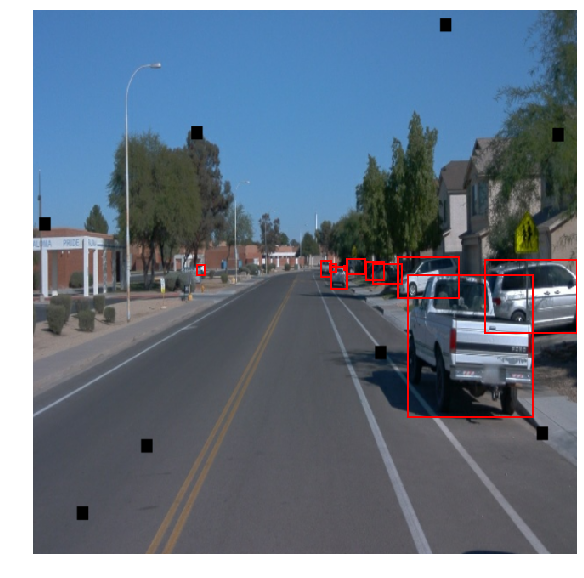

In [5]:
%matplotlib inline

for batch in train_dataset.take(2):
    display_batch(batch)

## Experiment 2: Random Crop + Adjust Gamma

Randomly crops a image to a fixed aspect ratio according to: Liu et al., SSD: Single shot multibox detector.

In [10]:
train_dataset = get_train_input("./experiments/augmentations_2/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1146261869236413282_1680_000_1700_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10599748131695282446_1380_000_1400_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', '/app/project/data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', '/app/project/data/train/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-11925224148023145510_1040_000_1060_000_with_camera_labels.tfrecord', '/app/project/data/train/segment-1051897962568538022_238_170_258_170_with_camera_labels.tfrecord', '/app/project/data/train/segment-100947433

INFO:tensorflow:Number of filenames to read: 70


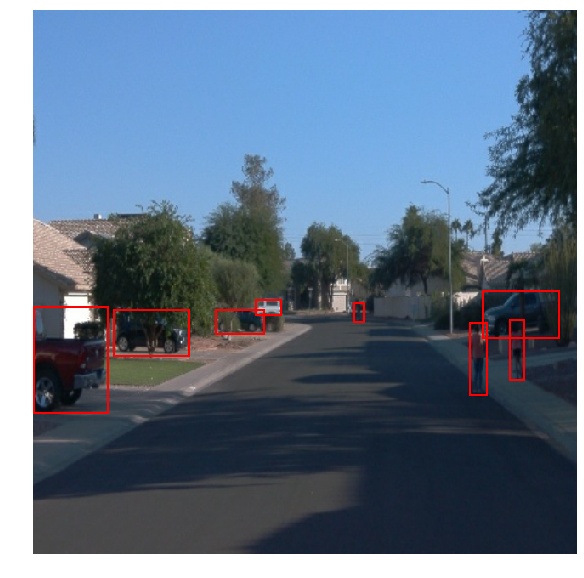

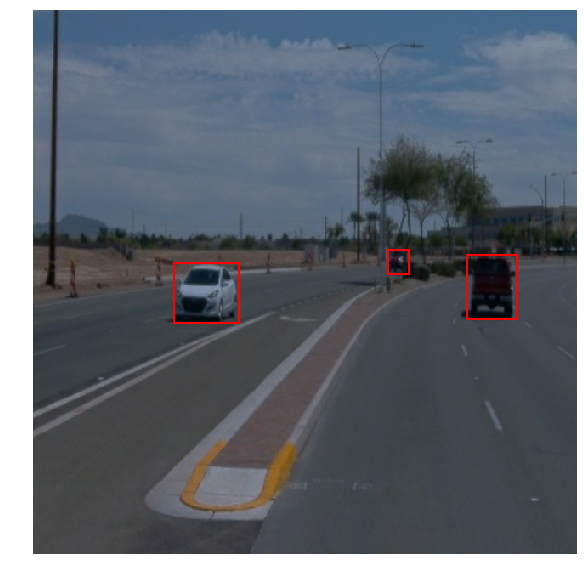

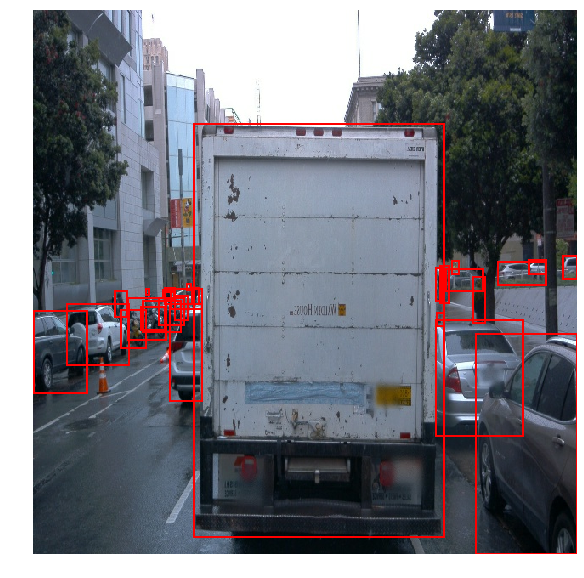

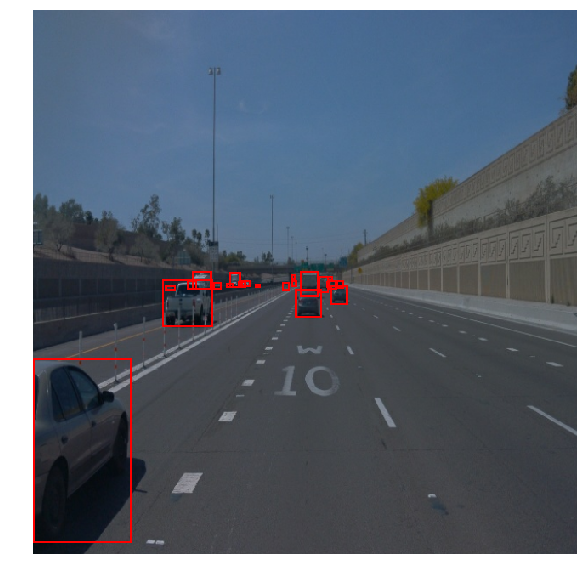

In [11]:
%matplotlib inline

for batch in train_dataset.take(2):
    display_batch(batch)